# T-test, F-test and  ANOVA


# T test

Now Let’s see some of widely used hypothesis testing type :-

    T Test ( Student T test)
    Z Test
    ANOVA Test
    Chi-Square Test

T- Test :- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.



# One sample t-test

One sample t-test : The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

Example :- you have 10 ages and you are checking whether avg age is 30 or not. (check code below for that using python)

In [5]:
from scipy.stats import ttest_1samp
import numpy as np

ages = np.genfromtxt('ages.csv')

print(ages)
ages_mean = np.mean(ages)
print(ages_mean)
tset, pval = ttest_1samp(ages, 30)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[32. 34. 29. 29. 22. 39. 38. 37. 38. 36. 30. 26. 22. 22.]
31.0
p-values 0.5605155888171379
we are accepting null hypothesis


# Two Sample T Test

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

In [1]:
from scipy.stats import ttest_ind
import numpy as np
week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")
print(week1)
print("week2 data :-\n")
print(week2)
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)
ttest,pval = ttest_ind(week1,week2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

[23.90506824 26.67631982 27.27433886 24.25757125 32.40423483 39.56919357
 23.07010059 29.82068109 27.59433809 28.05639569 27.06757262 30.41192979
 25.71358554 24.94294823 28.23123807 24.95337555 18.51231639 27.46234762
 28.38016611 13.91205901 29.02615866 26.90746774 22.8677726  24.8938289
 25.96947935 26.86869621 20.72676456 27.35988314 20.68408581 21.19846143
 16.25800931 23.92517681 24.47923229 29.47050863 27.28425372 26.93339272
 28.61026924 18.88377042 33.65468651 25.69470077 20.98291356 22.69700387
 28.60278855 21.36000443 30.77685156 20.83415999 23.79367158 19.7556718
 29.54421084 20.1433138 ]
week2 data :-

[18.63431907 31.28788036 34.96797943 21.81678117 28.21619974 39.39313736
 35.52223207 27.54222109 33.64395433 25.31673581 28.81392191 30.7358016
 26.37241881 26.0945555  26.34073477 19.42196017 32.58797652 24.84001926
 28.93348335 20.43667584 22.72495967 32.31728012 35.384306   29.66709637
 24.53512973 30.91406007 19.56117513 24.90816833 30.13163726 31.47466199
 27.77683598 

# Paired sampled t-test

The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

In [4]:
import pandas as pd
from scipy import stats
df = pd.read_csv("blood_pressure.csv")
df[['bp_before','bp_after']].describe()
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.60497835674891e-08
reject null hypothesis


# Z Test

Your sample size is greater than 30. Otherwise, use a t test.
Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
Your data should be randomly selected from a population, where each item has an equal chance of being selected.
Sample sizes should be equal if at all possible.
Example again we are using z-test for blood pressure with some mean like 156 (python code is below for same) one-sample Z test.

# One Sample Z Test

In [5]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.4121877285014063
accept null hypothesis


# Two Sample Z Test

In two sample z-test , similar to t-test here we are checking two independent data groups and deciding whether sample mean of two group is equal or not.
H0 : mean of two group is 0
H1 : mean of two group is not 0
Example : we are checking in blood data after blood and before blood data.

In [6]:
ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.6878840769222957e-09
accept null hypothesis


# Oneway F Test

Example : there are 3 different category of plant and their weight and need to check whether all 3 group are similar or not

In [8]:
df_anova = pd.read_csv('PlantGrowth.csv')
df_anova = df_anova[['weight','group']]
grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0159099583256229
reject null hypothesis


# Two Way F-test

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


# Chi-Square Test

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.
For example, in an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference

In [12]:
df_chi = pd.read_csv('chi-test.csv')
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2
Observed Values :-
 [[2 3]
 [2 2]]
Expected Values :-
 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]
Degree of Freedom:- 1
chi-square statistic:- 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# One-way (one factor) ANOVA

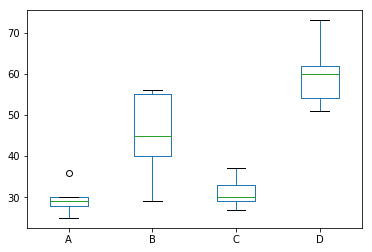

In [13]:
# load packages
import pandas as pd
# load data file
d = pd.read_csv("onewayanova.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [14]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.639241146210922e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [15]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  A      B      15.4    1.6929  29.1071  True 
  A      C      1.6    -12.1071 15.3071 False 
  A      D      30.4   16.6929  44.1071  True 
  B      C     -13.8   -27.5071 -0.0929  True 
  B      D      15.0    1.2929  28.7071  True 
  C      D      28.8   15.0929  42.5071  True 
----------------------------------------------


Test ANOVA assumptions

The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.

In [17]:
# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution

In [18]:
# load packages
import scipy.stats as stats
w, pvalue = stats.bartlett(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

# Two-way (two factor) ANOVA

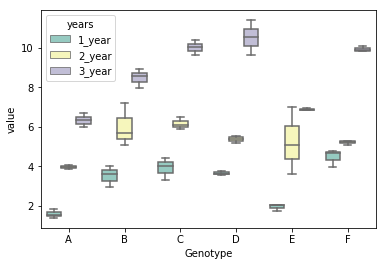

In [21]:
# load packages
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [22]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


he P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.